## Import des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sn; sn.set(font_scale = 1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['babouche', 'plat', 'tagine', 'theiere', 'verre', 'tapis', 'sac', 'bracelet', 'robe']
class_names_label = {class_name : i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

print(class_names_label)

IMAGE_SIZE = (150, 150)

{'babouche': 0, 'plat': 1, 'tagine': 2, 'theiere': 3, 'verre': 4, 'tapis': 5, 'sac': 6, 'bracelet': 7, 'robe': 8}


## Chargement des données

In [4]:
def load_data():
    DIRECTORY = r"D:\STAGE AI\Modele de classification\Images"
    CATEGORY = ["train", "test"]
    
    output = []
    
    for category in CATEGORY:
        path = os.path.join(DIRECTORY, category)
        print(path)
        images = []
        labels = []
        
        print("Loading {}".format(category))
        
        for folder in os.listdir(path):
            label = class_names_label[folder]
            
            for file in os.listdir(os.path.join(path, folder)): ## je fais une itération sur chaque image du dossier
                try:
                    img_path = os.path.join(os.path.join(path, folder), file) ## trouve le chemin de l'image

                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, IMAGE_SIZE)

                    images.append(image)
                    labels.append(label)
                    
                except Exception as e:
                    print("Error reading image: {}".format(img_path))
                    print(e)
                
        images = np.array(images, dtype= 'float32')
        labels = np.array(labels, dtype = 'int32')
        
        output.append((images, labels))
        
        
    return output


In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

D:\STAGE AI\Modele de classification\Images\train
Loading train
D:\STAGE AI\Modele de classification\Images\test
Loading test


In [6]:
print("{} Images dans le train set".format(len(train_images)))
print("{} Images dans le test set".format(len(test_images)))

A= len(train_images)+ len(test_images)
print("Au total: {} images ".format(A))

12012 Images dans le train set
1800 Images dans le test set
Au total: 13812 images 


## j'affiche 25 exemples d'images avec leur label

In [7]:
#train_images = train_images/255
train_images, train_labels = shuffle(train_images, train_labels, random_state = 1)



In [8]:
print(train_images.shape)
#print(train_images[0])

(12012, 150, 150, 3)


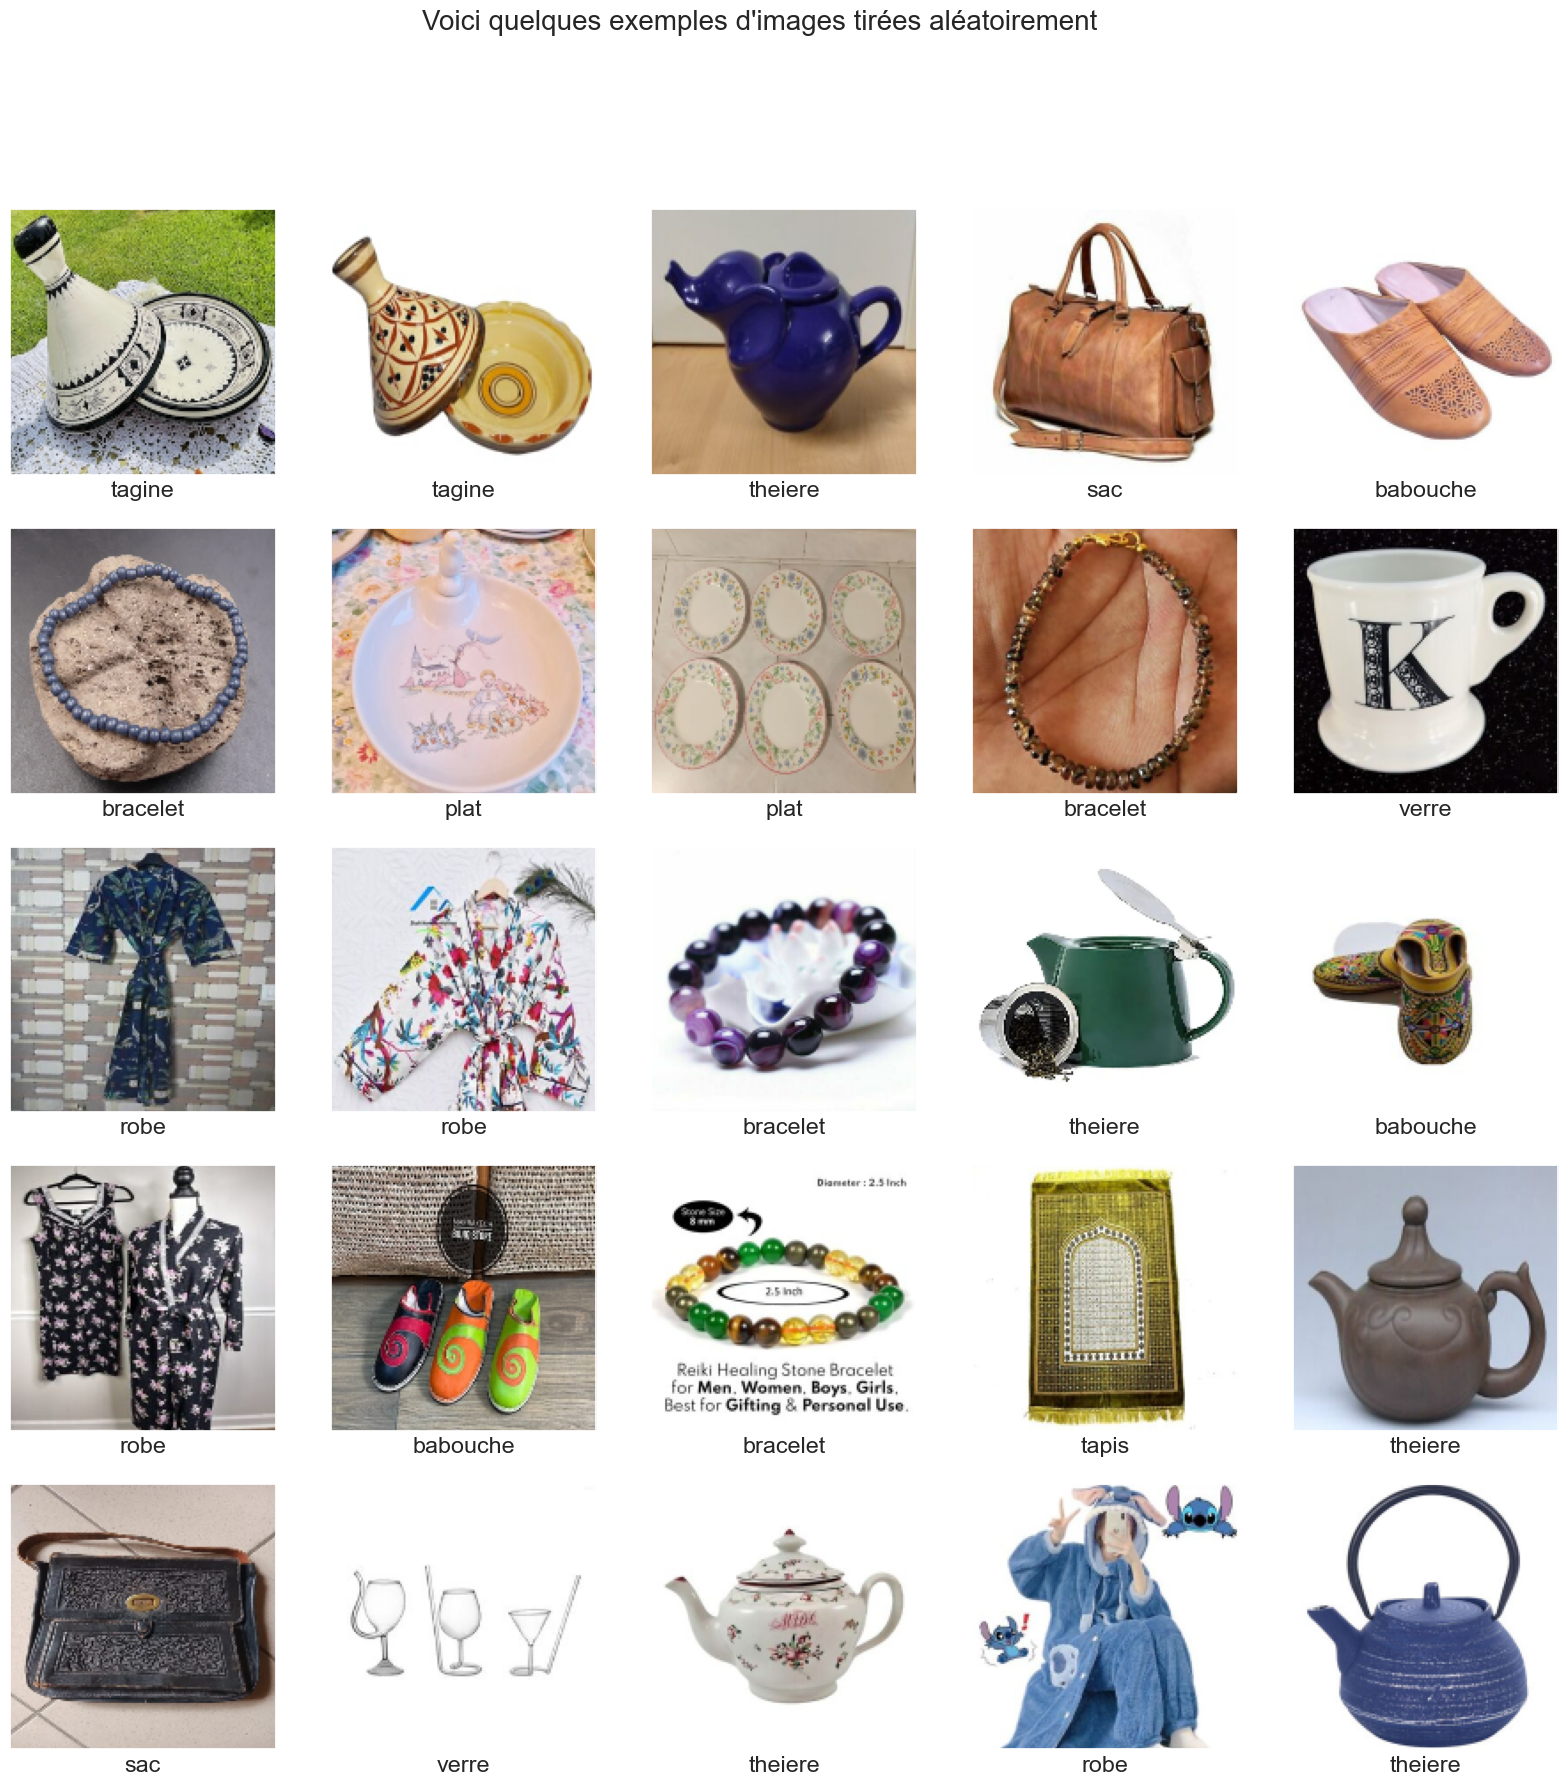

' La ligne plt.imshow(images[i].astype(np.uint8)) peut aussi etre remplace par les deux lignes suivantes tout en \n    jouant sur figsize pour une bonne visibilité.\n    \n    image = cv2.resize(images[i], figsize)\n    plt.imshow(image.astype(np.uint8)\n    '

In [9]:
def display_examples(class_names, images, labels):   
    
    figsize = (20,20)
    fig = plt.figure(figsize = figsize)
    fig.suptitle("Voici quelques exemples d'images tirées aléatoirement", fontsize = 20)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        #image = cv2.resize(images[i], figsize)
        plt.imshow(images[i].astype(np.uint8))#, cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
display_examples(class_names, train_images, train_labels)
    
    
""" La ligne plt.imshow(images[i].astype(np.uint8)) peut aussi etre remplace par les deux lignes suivantes tout en 
    jouant sur figsize pour une bonne visibilité.
    
    image = cv2.resize(images[i], figsize)
    plt.imshow(image.astype(np.uint8)
    """

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(9, activation = tf.nn.softmax)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, batch_size = 128, epochs=7, validation_split = 0.2)

Epoch 1/7
76/76 [==============================] - 77s 992ms/step - loss: 31.3869 - accuracy: 0.2400 - val_loss: 1.7847 - val_accuracy: 0.3854
Epoch 2/7
76/76 [==============================] - 92s 1s/step - loss: 1.4134 - accuracy: 0.5342 - val_loss: 1.4986 - val_accuracy: 0.5273
Epoch 3/7
76/76 [==============================] - 91s 1s/step - loss: 0.7325 - accuracy: 0.7692 - val_loss: 1.7981 - val_accuracy: 0.4732
Epoch 4/7
76/76 [==============================] - 93s 1s/step - loss: 0.3467 - accuracy: 0.8947 - val_loss: 1.7675 - val_accuracy: 0.6097
Epoch 5/7
76/76 [==============================] - 92s 1s/step - loss: 0.1463 - accuracy: 0.9600 - val_loss: 2.0980 - val_accuracy: 0.6192
Epoch 6/7
76/76 [==============================] - 88s 1s/step - loss: 0.0695 - accuracy: 0.9828 - val_loss: 2.3554 - val_accuracy: 0.6251
Epoch 7/7
76/76 [==============================] - 101s 1s/step - loss: 0.0365 - accuracy: 0.9919 - val_loss: 2.4104 - val_accuracy: 0.6217


In [14]:
def plot_accuracy_loss(history):
    
    fig = plt.figure(figsize=(10,5))
    
    # graphe d'accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title(" train accuracy vs val_ accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    # graphe de perte de données
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title(" train loss vs val_ loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.show()
    

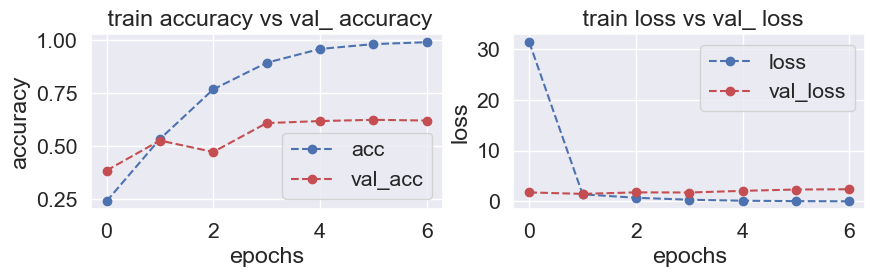

In [15]:
plot_accuracy_loss(history)

In [16]:
test_loss = model.evaluate(test_images, test_labels, verbose = 1)

57/57 [==============================] - 3s 56ms/step - loss: 2.5361 - accuracy: 0.6089


In [17]:
predictions = model.predict(test_images)  # vecteur de probabilité
pred_labels = np.argmax(predictions, axis = 1)
print(classification_report(test_labels, pred_labels))

57/57 [==============================] - 3s 55ms/step
              precision    recall  f1-score   support

           0       0.59      0.70      0.64       200
           1       0.63      0.66      0.65       200
           2       0.77      0.73      0.75       200
           3       0.68      0.78      0.72       200
           4       0.45      0.31      0.37       200
           5       0.67      0.54      0.60       200
           6       0.49      0.59      0.54       200
           7       0.55      0.41      0.47       200
           8       0.62      0.76      0.68       200

    accuracy                           0.61      1800
   macro avg       0.61      0.61      0.60      1800
weighted avg       0.61      0.61      0.60      1800



In [59]:
# Save the model
model_path = r"D:\STAGE AI\VChatbot\Modele de classification\TINDY_poc_model.h5"
model.save(model_path)

# Prédire la classe d'une image avec le modèle (deux méthodes qui marchent)

### Première méthode ( Simple)

## on charge le modèle

model_path = r"D:\STAGE AI\VChatbot\TINDY_poc_model.h5"
model = tf.keras.models.load_model(model_path)

## on charge l'image qu'on veut prédire
image_path = r"D:\STAGE AI\Chatbot\Images\test\plat\il_340x270.1228174298_x5q6.jpg"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE)

## prédiction de la classe
prediction = model.predict(np.array([image]))
predicted_class = class_names[np.argmax(prediction)]

print("The predicted class is:", predicted_class)

## Deuxieme méthode avec une fonction

j'ai utilisé PILOW au lieu de CV2 car CV2 ne prend pas les .png en compte et affiche une erreur. Ce n'est pas le cas pour Pilow


In [60]:
model_path = r"D:\STAGE AI\Modele de classification\TINDY_poc_model.h5"
model = tf.keras.models.load_model(model_path)

image_path = r"D:\STAGE AI\Autres\shoots_mytindy\publié\14.png"
from PIL import Image

def predict_class(model, image_path):
    # Load the image
    image = Image.open(image_path)
    image = image.convert('RGB')
    image = image.resize(IMAGE_SIZE)

    # Predict the class of the image
    prediction = model.predict(np.array([np.array(image)]))
    predicted_class = class_names[np.argmax(prediction)]

    return predicted_class

predict_class(model, image_path)

1/1 [==============================] - 0s 215ms/step


'tagine'